A unit of atmospheric preasssure = 101,325 Pa = 101.325 KPa = 1013.25 HPa = 760mm of Hg<br>
LPS22HB Preassure Sensor Range<br><br> $26 KPa \leq p \leq126 KPa$ <br><br> Current Consumption $3 \mu A$ <br><br>
Sampling Rate: $14.5Hz$ (Can go upto $75Hz$)

1. Putting Sensor outside mask
2. Cloth mask and other cloth
3. Multilayed mask
4. Both Sensors stationary
5. Swap Sensors stationary
6. P

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy

In [2]:
data11 = pd.read_csv('data/com11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/com13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)

In [33]:
data11.head()

,Date,Time,Preassure 1
0,2020-12-15,2020-12-15 22:21:49.476,101.041428
1,2020-12-15,2020-12-15 22:21:49.476,101.038918
2,2020-12-15,2020-12-15 22:21:49.518,101.037819
3,2020-12-15,2020-12-15 22:21:49.518,101.040115
4,2020-12-15,2020-12-15 22:21:49.518,101.039963


In [34]:
data13.head()

,Date,Time,Preassure 2
0,2020-12-15,2020-12-15 22:22:11.274,101.084518
1,2020-12-15,2020-12-15 22:22:11.274,101.084305
2,2020-12-15,2020-12-15 22:22:11.343,101.083542
3,2020-12-15,2020-12-15 22:22:11.343,101.087303
4,2020-12-15,2020-12-15 22:22:11.343,101.087280


In [35]:
combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-15 22:31:59.888,101.044334,101.098167
2020-12-15 22:32:00.361,101.040970,101.103027
2020-12-15 22:32:00.392,101.042892,101.098022
2020-12-15 22:32:00.566,101.042503,101.101486
2020-12-15 22:32:05.728,101.044044,101.099197


<AxesSubplot:xlabel='Time'>

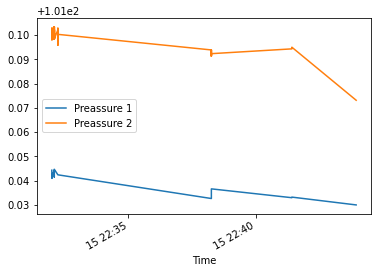

In [27]:
combined1113.plot()

In [36]:
np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

0.05704357142857067

In [37]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

<AxesSubplot:xlabel='Time'>

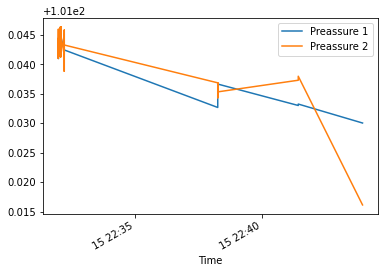

In [38]:
combined1113.plot()

## Experiment 2 - FVC Maneuver

In [28]:
data11 = pd.read_csv('data/com11-expt.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/com13-expt.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)
combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-17 22:51:37.041,101.028709,101.045189
2020-12-17 22:51:37.073,101.031418,101.046707
2020-12-17 22:51:37.073,101.031418,101.046043
2020-12-17 22:51:37.073,101.031418,101.044113
2020-12-17 22:51:37.073,101.031418,101.044678


In [24]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

In [31]:
combined1113['Preassure 1']=(combined1113['Preassure 1']-combined1113['Preassure 1'].min())/(combined1113['Preassure 1'].max()-combined1113['Preassure 1'].min())
combined1113['Preassure 2']=(combined1113['Preassure 2']-combined1113['Preassure 2'].min())/(combined1113['Preassure 2'].max()-combined1113['Preassure 2'].min())

In [32]:
combined1113

,Preassure 1,Preassure 2
Time,,
2020-12-17 22:51:37.041,0.285135,0.221388
2020-12-17 22:51:37.073,0.500597,0.228757
2020-12-17 22:51:37.073,0.500597,0.225534
2020-12-17 22:51:37.073,0.500597,0.216164
2020-12-17 22:51:37.073,0.500597,0.218907
...,...,...
2020-12-17 22:53:04.188,0.846496,0.453480
2020-12-17 22:53:04.521,0.234789,0.433439
2020-12-17 22:53:04.606,0.211724,0.453369


<AxesSubplot:xlabel='Time'>

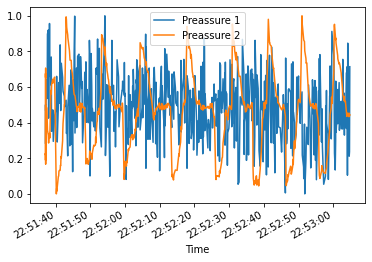

In [33]:
combined1113.plot()

## Experiment 3 - Normal Breathing

In [2]:
data11 = pd.read_csv('data/expt3_11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/expt3_13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)
combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-16 10:09:28.135,101.285599,101.371971
2020-12-16 10:09:28.135,101.285599,101.382812
2020-12-16 10:09:33.987,101.288841,101.340111
2020-12-16 10:09:34.238,101.286301,101.326637
2020-12-16 10:09:35.459,101.288307,101.384254


In [3]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

<AxesSubplot:xlabel='Time'>

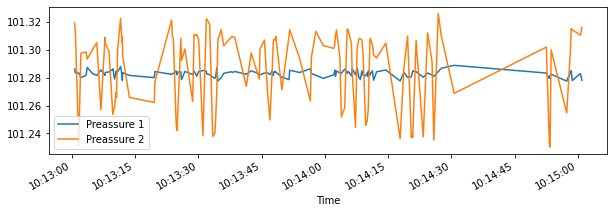

In [12]:
combined1113['2020-12-16 10:13:00':'2020-12-16 10:15:00'].plot(figsize=(10,3))

## Experiment 4

In [76]:
data11 = pd.read_csv('data/e4-com11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data11.Time = data11.Time.astype('datetime64[s]')
data13 = pd.read_csv('data/e4-com13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)
data13.Time = data13.Time.astype('datetime64[s]')

combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-17 04:40:10,101.424171,101.489548
2020-12-17 04:40:10,101.424538,101.489548
2020-12-17 04:40:10,101.420799,101.489548
2020-12-17 04:40:10,101.428467,101.489548
2020-12-17 04:40:10,101.427467,101.489548


In [77]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

<AxesSubplot:xlabel='Time'>

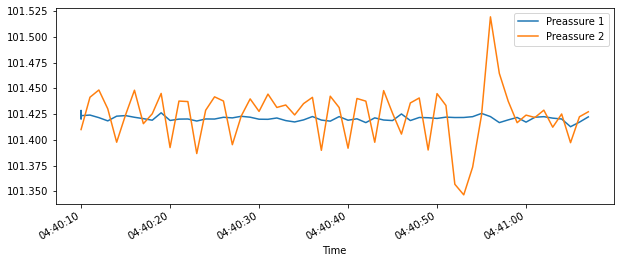

In [78]:
combined1113.plot(figsize=(10,4))

In [80]:
combined1113['Preassure 1']=(combined1113['Preassure 1']-combined1113['Preassure 1'].min())/(combined1113['Preassure 1'].max()-combined1113['Preassure 1'].min())
combined1113['Preassure 2']=(combined1113['Preassure 2']-combined1113['Preassure 2'].min())/(combined1113['Preassure 2'].max()-combined1113['Preassure 2'].min())

<AxesSubplot:xlabel='Time'>

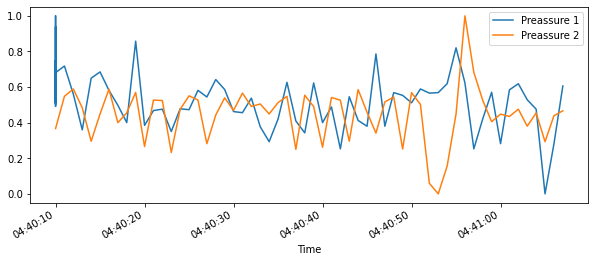

In [81]:
combined1113.plot(figsize=(10,4))

## Experiment 5

In [86]:
# 10hz data
data11 = pd.read_csv('data/e5-com11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/e5-com13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)


combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-17 10:30:30.198,101.421143,101.450218
2020-12-17 10:30:30.298,101.422043,101.453201
2020-12-17 10:30:30.402,101.422462,101.455734
2020-12-17 10:30:30.503,101.421219,101.458176
2020-12-17 10:30:30.604,101.417648,101.462646


In [87]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

<AxesSubplot:xlabel='Time'>

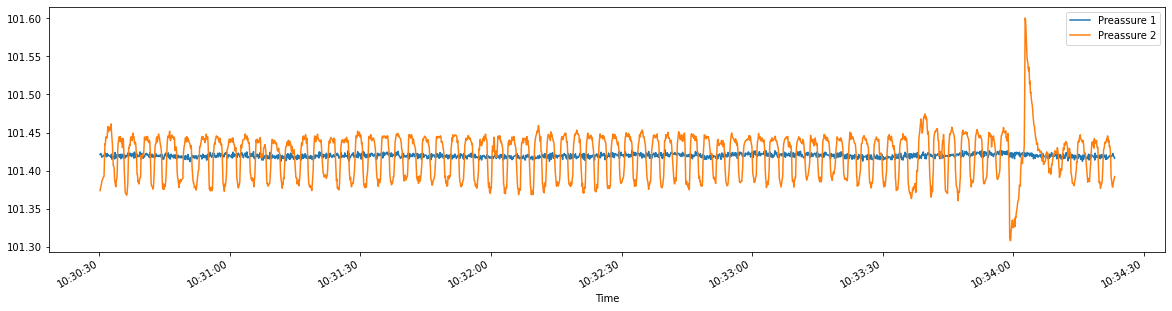

In [88]:
combined1113.plot(figsize=(20,5))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


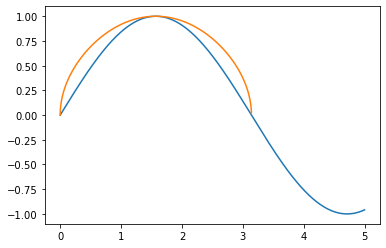

In [105]:
t = np.arange(0,5,.001)
y = np.sin(t)
y1 = np.sqrt(y)
plt.plot(t,y)
plt.plot(t,y1)

<AxesSubplot:xlabel='Time'>

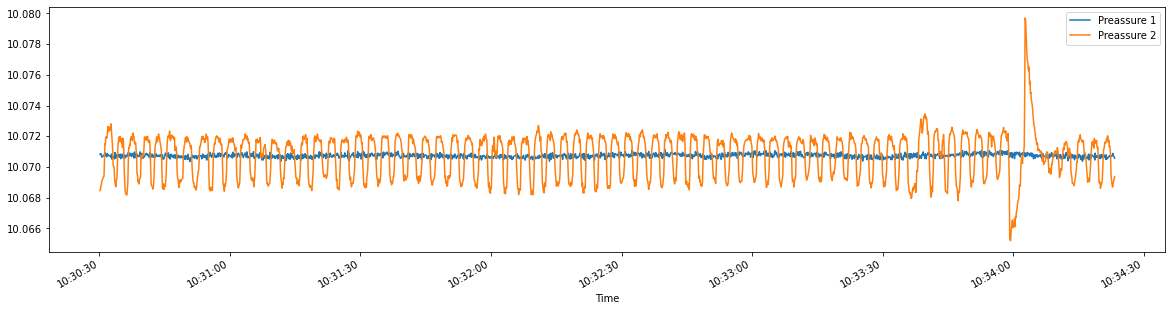

In [61]:
#Square Root
combined1113['Preassure 1'] = (combined1113['Preassure 1'])**(1/2)
combined1113['Preassure 2'] = (combined1113['Preassure 2'])**(1/2)
combined1113.plot(figsize=(20,5))

In [89]:
#area of interest
df = combined1113['2020-12-17 10:34:2.0000':'2020-12-17 10:34:6.00000']['Preassure 2']

<AxesSubplot:xlabel='Time'>

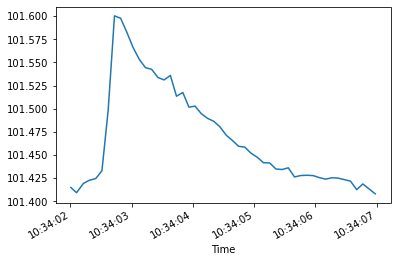

In [90]:
df.plot()

In [91]:
df1 = df.cumsum(axis = 0)

<AxesSubplot:xlabel='Time'>

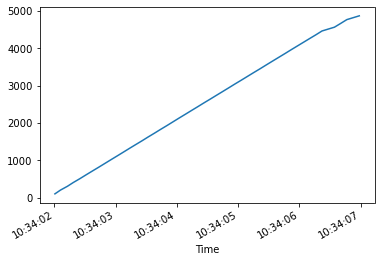

In [92]:
df1.plot()

In [93]:
newdf = pd.DataFrame()
newdf['Preassure'] = df
newdf['Volume'] = df1

<AxesSubplot:xlabel='Volume'>

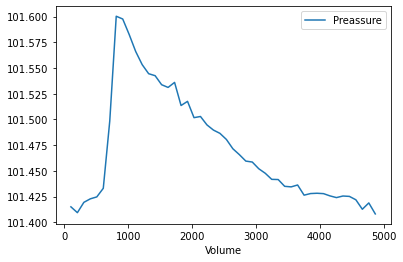

In [94]:
newdf.plot(y='Preassure', x='Volume')

In [13]:
combined1113['Preassure 1']=(combined1113['Preassure 1']-combined1113['Preassure 1'].min())/(combined1113['Preassure 1'].max()-combined1113['Preassure 1'].min())
combined1113['Preassure 2']=(combined1113['Preassure 2']-combined1113['Preassure 2'].min())/(combined1113['Preassure 2'].max()-combined1113['Preassure 2'].min())

<AxesSubplot:xlabel='Time'>

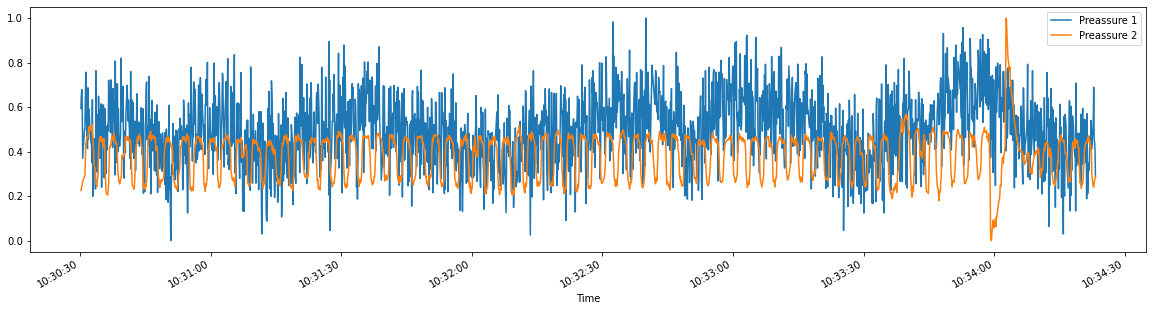

In [14]:
combined1113.plot(figsize=(20,5))

<AxesSubplot:xlabel='Time'>

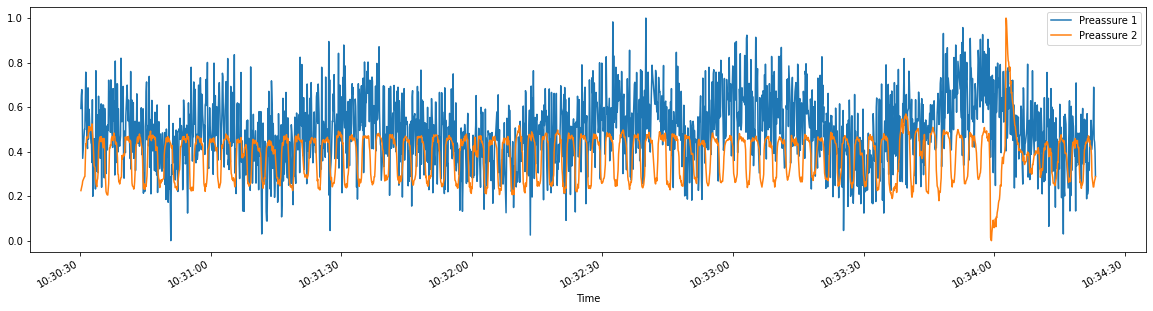

In [91]:
combined1113['Preassure 1']=(combined1113['Preassure 1']-combined1113['Preassure 1'].min())/(combined1113['Preassure 1'].max()-combined1113['Preassure 1'].min())
combined1113['Preassure 2']=(combined1113['Preassure 2']-combined1113['Preassure 2'].min())/(combined1113['Preassure 2'].max()-combined1113['Preassure 2'].min())
combined1113.plot(figsize=(20,5))

## Experiment 6

In [3]:
# 10hz data
data11 = pd.read_csv('data/expt6-com11.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/expt6-com13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)


combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-18 17:51:12.552,100.888039,100.947853
2020-12-18 17:51:13.171,100.887474,100.946335
2020-12-18 17:51:14.576,100.890793,100.946701
2020-12-18 17:51:14.677,100.888428,100.947044
2020-12-18 17:51:16.603,100.890015,100.951126


In [4]:
combined1113['Preassure 2'] = combined1113['Preassure 2'] - np.mean(combined1113['Preassure 2'] - combined1113['Preassure 1'])

<AxesSubplot:xlabel='Time'>

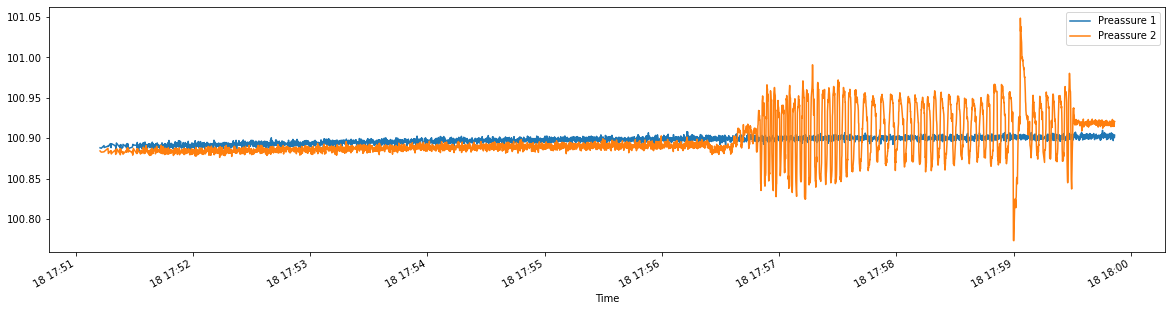

In [5]:
combined1113.plot(figsize=(20,5))

In [6]:
combined1113['Preassure 1']=(combined1113['Preassure 1']-combined1113['Preassure 1'].min())/(combined1113['Preassure 1'].max()-combined1113['Preassure 1'].min())
combined1113['Preassure 2']=(combined1113['Preassure 2']-combined1113['Preassure 2'].min())/(combined1113['Preassure 2'].max()-combined1113['Preassure 2'].min())

<AxesSubplot:xlabel='Time'>

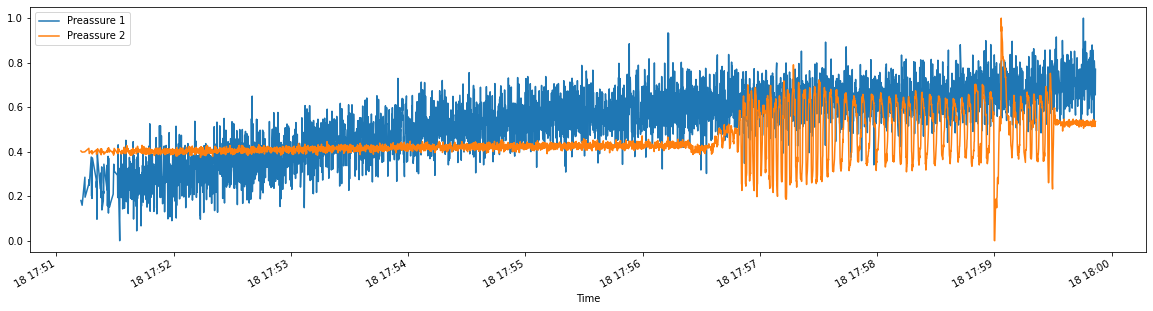

In [7]:
combined1113.plot(figsize=(20,5))

## Experiment 7

In [66]:
# 10hz data
data11 = pd.read_csv('data/expt7-com7.csv', sep=' ', names=['Date', 'Time', 'Preassure 1'])
data11.Time = pd.DatetimeIndex(data11.Time)
data13 = pd.read_csv('data/expt7-com13.csv', sep=' ', names=['Date', 'Time', 'Preassure 2'])
data13.Time = pd.DatetimeIndex(data13.Time)


combined1113 = pd.merge(data11, data13, on='Time')
combined1113.index = combined1113.Time
combined1113 = combined1113.drop(['Date_x', 'Date_y', 'Time'], axis=1)
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-18 18:29:29.979,100.993118,100.979958
2020-12-18 18:29:30.080,100.998413,100.979958
2020-12-18 18:29:30.180,100.994827,100.980637
2020-12-18 18:29:30.280,100.995773,100.979904
2020-12-18 18:29:30.381,100.994484,100.982399


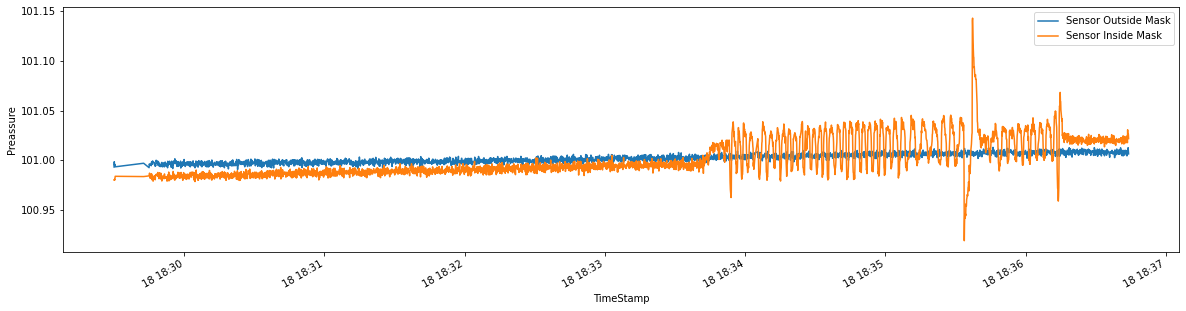

In [67]:
ax = combined1113.plot(figsize=(20,5))
ax.set_xlabel('TimeStamp')
ax.set_ylabel('Preassure')
ax.legend(['Sensor Outside Mask', 'Sensor Inside Mask'])

In [28]:
combined1113.head()

,Preassure 1,Preassure 2
Time,,
2020-12-18 18:29:29.979,100.993118,100.979958
2020-12-18 18:29:30.080,100.998413,100.979958
2020-12-18 18:29:30.180,100.994827,100.980637
2020-12-18 18:29:30.280,100.995773,100.979904
2020-12-18 18:29:30.381,100.994484,100.982399


Text(0, 0.5, 'Preassure')

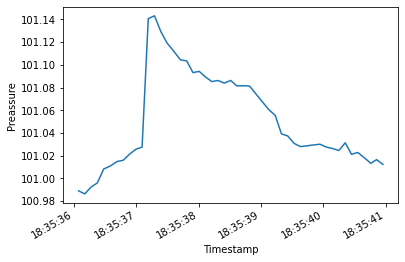

In [68]:
#area of interest
df = combined1113['2020-12-18 18:35:36':'2020-12-18 18:35:40.00000']['Preassure 2']
ax = df.plot()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Preassure')

Text(0, 0.5, 'Flow')

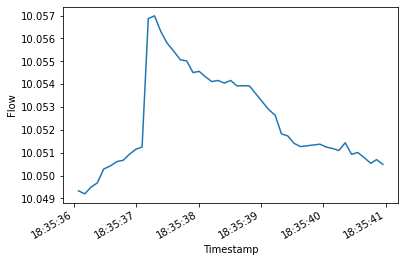

In [69]:
df2 = np.sqrt(df)
ax = df2.plot()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Flow')

Text(0, 0.5, 'Volume')

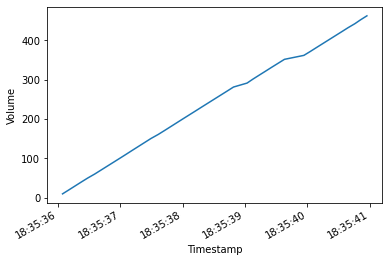

In [70]:
df3 = df2.cumsum(axis = 0)
ax = df3.plot()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Flow')

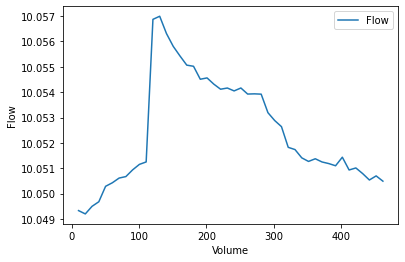

In [72]:
newdf = pd.DataFrame()
newdf['Flow'] = df2
newdf['Volume'] = df3
ax = newdf.plot(y='Flow', x='Volume')
ax.set_xlabel('Volume')
ax.set_ylabel('Flow')